In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os, sys

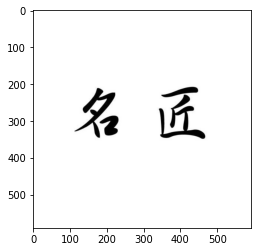

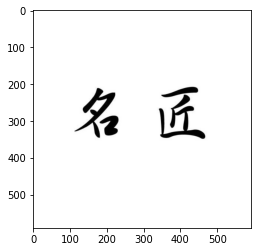

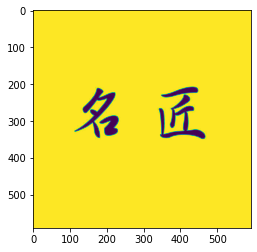

In [134]:
path = r"./images/10280029480.jpg"

#load the image
image = cv2.imread(path)

plt.imshow(image)
plt.show()

if image is None:
    print ('Error opening image: ' + path)

ori = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(ori)
plt.show()

gray = cv2.cvtColor(ori, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

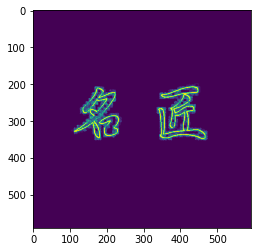

In [135]:
# 用Sobel算子計算x，y方向上的梯度，之後在x方向上減去y方向上的梯度
# 我們留下具有高水平梯度和低垂直梯度的圖像區域
gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)


# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient)
plt.show()
           

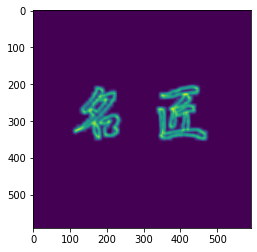

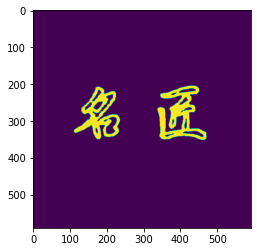

In [136]:
# blur and the image 去除圖像上的噪聲。
blurred = cv2.blur(gradient, (9, 9))
plt.imshow(blurred)
plt.show()

# threshold the image 對模糊圖像二值化
(_, thresh) = cv2.threshold(blurred, 90, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
plt.show()

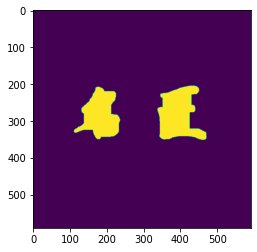

In [137]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed)
plt.show()

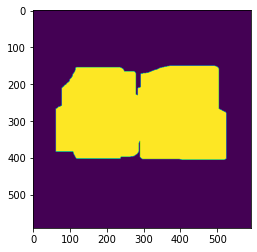

In [138]:
 # perform a series of erosions and dilations 
closed = cv2.erode(closed, None, iterations=4) # 侵蝕
closed = cv2.dilate(closed, None, iterations=58) # 膨脹
plt.imshow(closed)
plt.show()

中心坐標： (292.4999694824219, 277.9999694824219)
寬度： 460.99993896484375
長度： 253.99996948242188
旋轉角度： -0.0
四個頂點座標為
 [[ 62 404]
 [ 62 150]
 [522 151]
 [522 404]]


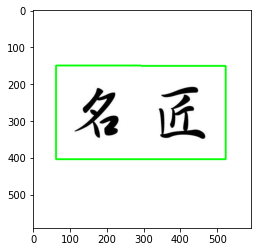

In [139]:
(cnts,_) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]

# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))

print("中心坐標：", rect[0])
print("寬度：", rect[1][0])
print("長度：", rect[1][1])
print("旋轉角度：", rect[2])
print("四個頂點座標為\n", box)

cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
plt.imshow(image)
plt.show()

62 522 150 404


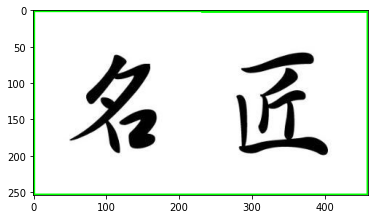

In [140]:
Xs = [i[0] for i in box]
Ys = [i[1] for i in box]
x1 = min(Xs)
x2 = max(Xs)
y1 = min(Ys)
y2 = max(Ys)

if x1 < 0:
    x1 = 0
if y1 < 0:    
    y1 = 0

print(x1,x2,y1,y2)
hight = y2 - y1
width = x2 - x1
crop_img = image[y1:y1+hight, x1:x1+width]

plt.imshow(crop_img)
plt.show()


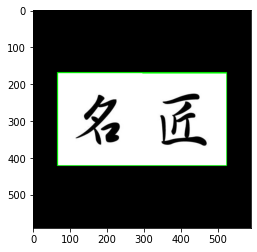

In [141]:
img_result = tf.image.resize_with_crop_or_pad(crop_img,590,590)
# cv2.imwrite("./images_out/contoursImage2.jpg", img_result)

plt.imshow(img_result)
plt.show()